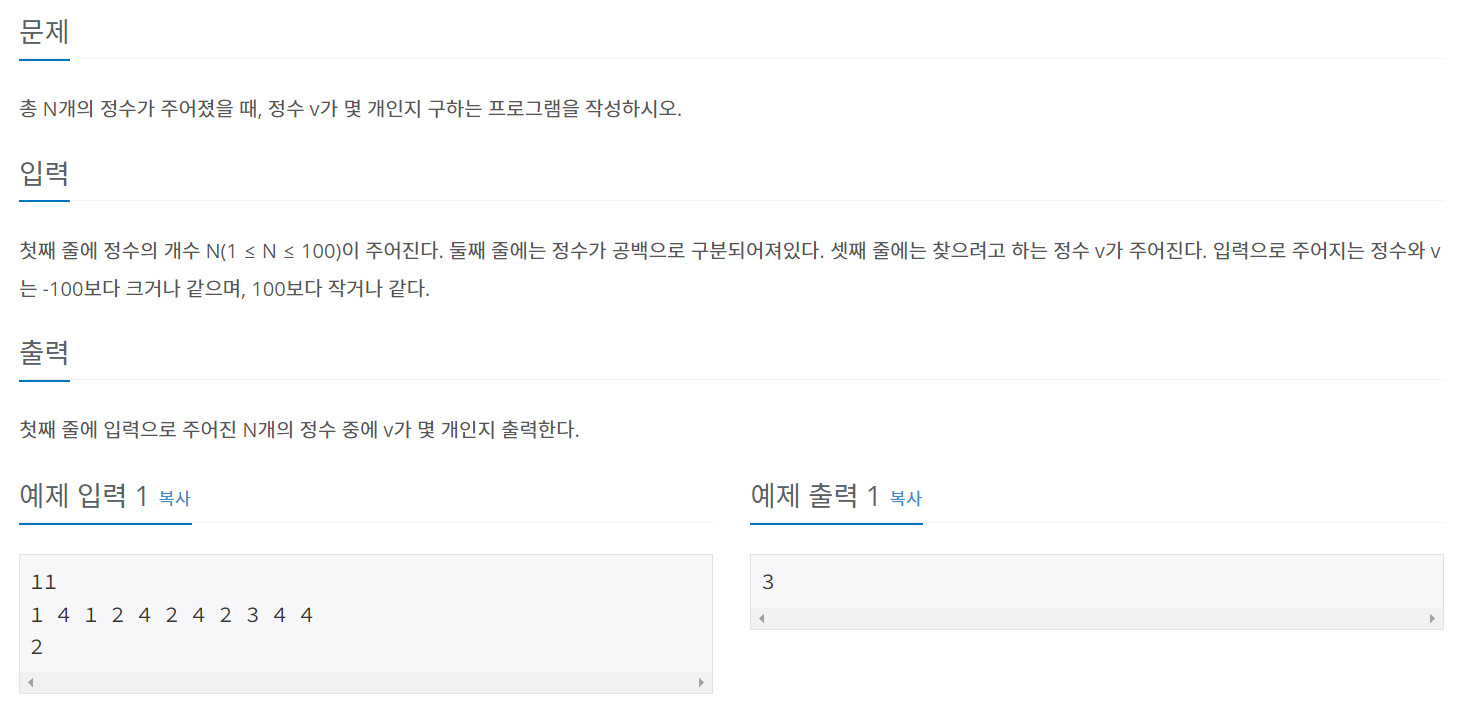

In [45]:
N = int(input())
N_list = list(map(int, input().split()))
v = int(input())
# print(N_list.count(v))
ls =  []
for i in N_list:
    if i == v:
        ls.append(i)
ls         

[2, 2, 2]

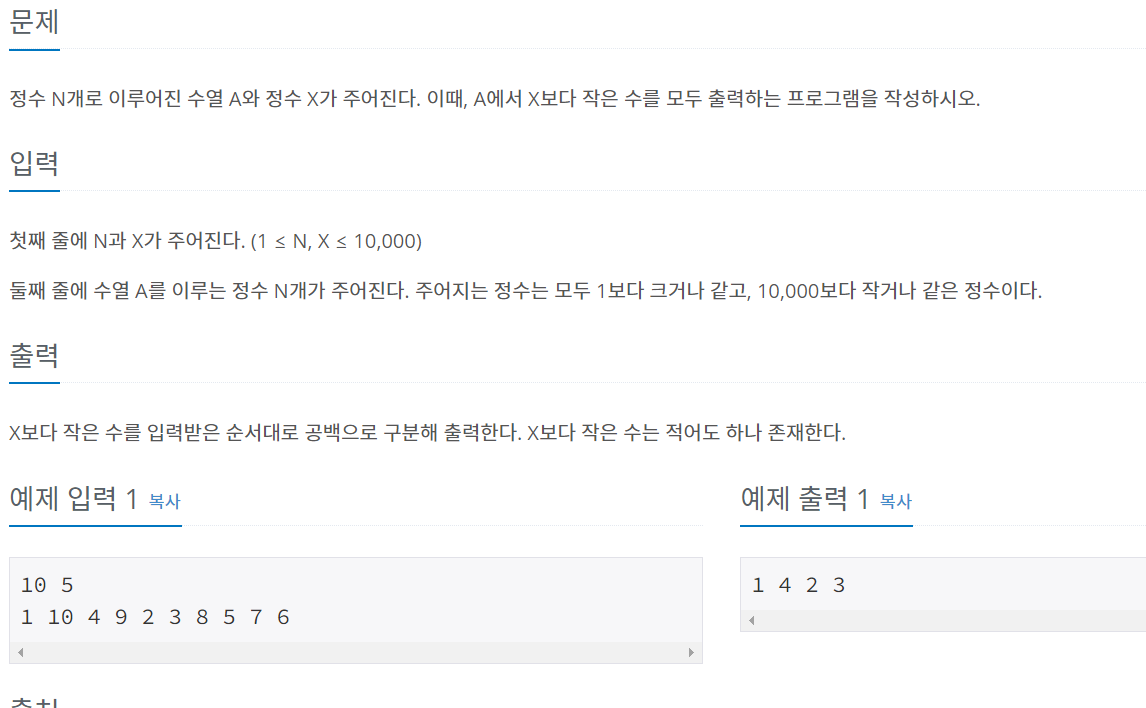

In [4]:
a, b = map(int, input().split())
c = list(map(int, input().split()))
ls = []
for i in range(len(c)):
    if c[i] < b:
        ls.append(i)
ls 

[0, 2, 4, 5]

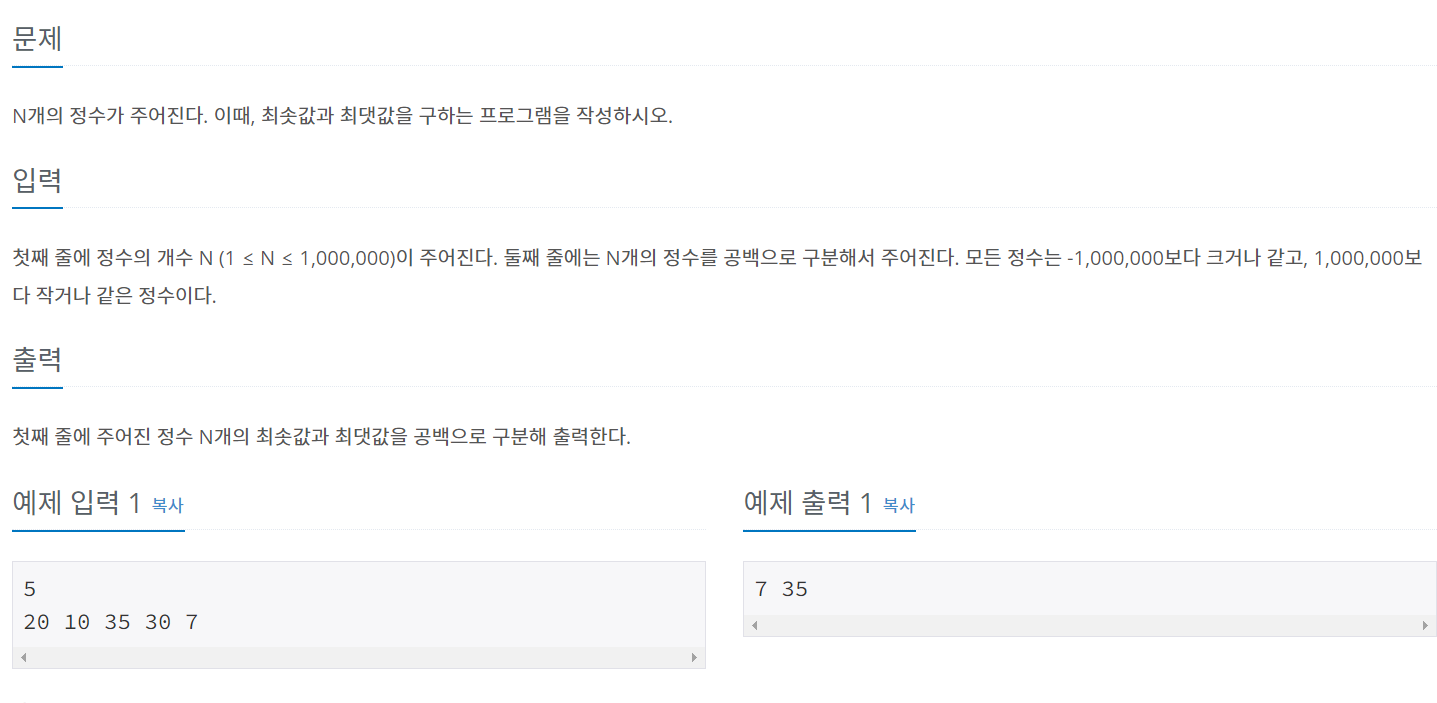

In [10]:
a = int(input())
n_list = list(map(int, input().split()))
print(min(n_list), max(n_list))


7 35


---

In [1]:
#  라이브러리 로드

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, anderson, kstest,jarque_bera, normaltest,anderson_ksamp
from scipy.stats import levene,bartlett
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.datasets import load_iris

In [2]:
#  정규성 검정하는 함수
def normality_test(df,tool="Shapiro"):
    result_dict = {"col" :[], "p_val":[], "t_val":[]}
    if tool == "Shapiro":
        for i in df.columns:
            statistic, p_value = shapiro(df[i].values)
            result_dict["col"].append(i)
            result_dict["p_val"].append(p_value)
            result_dict["t_val"].append(statistic)
            df_test = pd.DataFrame(result_dict)
    if tool == "ks":
        for i in df.columns:
            statistic, p_value = kstest(df[i].values,"norm")
            result_dict["col"].append(i)
            result_dict["p_val"].append(p_value)
            result_dict["t_val"].append(statistic)
            df_test = pd.DataFrame(result_dict)
    if tool == "jarque":
        for i in df.columns:
            statistic, p_value = jarque_bera(df[i].values)
            result_dict["col"].append(i)
            result_dict["p_val"].append(p_value)
            result_dict["t_val"].append(statistic)
            df_test = pd.DataFrame(result_dict)
    if tool == "nomal":
        for i in df.columns:
            statistic, p_value = normaltest(df[i].values)
            result_dict["col"].append(i)
            result_dict["p_val"].append(p_value)
            result_dict["t_val"].append(statistic)
            df_test = pd.DataFrame(result_dict)
    if tool == "anderson":
        result_dict_1 = {"col" :[], "critical_values":[], "t_val":[]}
        for i in df.columns:
            result = anderson(df[i].values)
            result_dict_1["col"].append(i)
            result_dict_1["critical_values"].append(result.critical_values[2])
            result_dict_1["t_val"].append(result.statistic)
            df_test = pd.DataFrame(result_dict_1) 
    return df_test

# 등분산 검정 함수
def homoscedasticity_test(df,tool):
    result_dict = {"col":[], "p_val":[], "t_val":[]}
    if tool == "levene":
        for i in df.columns:
            statistic, p_value = levene(df[df["point"]==1][i], df[df["point"]==0][i])
            result_dict["col"].append(i)
            result_dict["p_val"].append(p_value)
            result_dict["t_val"].append(statistic)
            df_homoscedasticity_test = pd.DataFrame(result_dict)
    if tool == "bartlett":
        for i in df.columns:
            statistic, p_value = bartlett(df[df["point"]==1][i], df[df["point"]==0][i])
            result_dict["col"].append(i)
            result_dict["p_val"].append(p_value)
            result_dict["t_val"].append(statistic)
            df_homoscedasticity_test = pd.DataFrame(result_dict)
    return df_homoscedasticity_test

# t 검정

def t_test(df,tool):
    result_dict = {"col":[], "p_val":[], "t_val":[]}
    if tool == "student":
        for i in df.columns:
            statistic, p_value = stats.ttest_ind(df[df['point']==1][i], df[df['point']==0][i])
            result_dict["col"].append(i)
            result_dict["p_val"].append(p_value)
            result_dict["t_val"].append(statistic)
            df_t_test = pd.DataFrame(result_dict)
    if tool == "welch":
        for i in df.columns:
            statistic, p_value = stats.ttest_ind(df[df['point']==1][i], df[df['point']==0][i],equal_var=False)
            result_dict["col"].append(i)
            result_dict["p_val"].append(p_value)
            result_dict["t_val"].append(statistic)
            df_t_test = pd.DataFrame(result_dict)
    return df_t_test



def durbin(df):
    dw_statistic = sm.stats.stattools.durbin_watson(df.target)
    if dw_statistic < 2:
        print("양의 자기상관이 있다.",dw_statistic)
    elif dw_statistic > 2:
        print("음의 자기상관이 있다.",dw_statistic)
    else:
        print("자기상관이 없다.",dw_statistic)

---
# LinearRegression

    # statsmodels 패키지를 사용한 선형 회귀분석

    iris = load_iris()

    # 독립 변수와 종속 변수 데이터 준비
    X = iris.data
    y = iris.target

    # OLS 모델 생성
    ols_model = sm.OLS(y, sm.add_constant(X))

    # OLS 모델 피팅 및 결과 요약
    ols_result = ols_model.fit()
    print(ols_result.summary())
---
    sklearn 패키지를 사용한 선형 회귀분석
    # 선형 회귀 모델 초기화
    model = LinearRegression() # 상수항 결합을 자동으로 해주므로 사용자가 직접 add_constant 등의 명령를 써서 상수항 결합을 할 필요는 없다.

    # 모델 피팅
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    # 예측값과 실제값을 빼줘서 잔차 도출
    잔차 = pred - y_test
    잔차.reset_index( drop=True, inplace=True)

    # 절편, 회귀계수 출력
    df_co = pd.DataFrame(data=model.coef_, columns=model.feature_names_in_)
    print("절편:", model.intercept_)
    print(mean_squared_error(y_test,pred))
    df_co

    

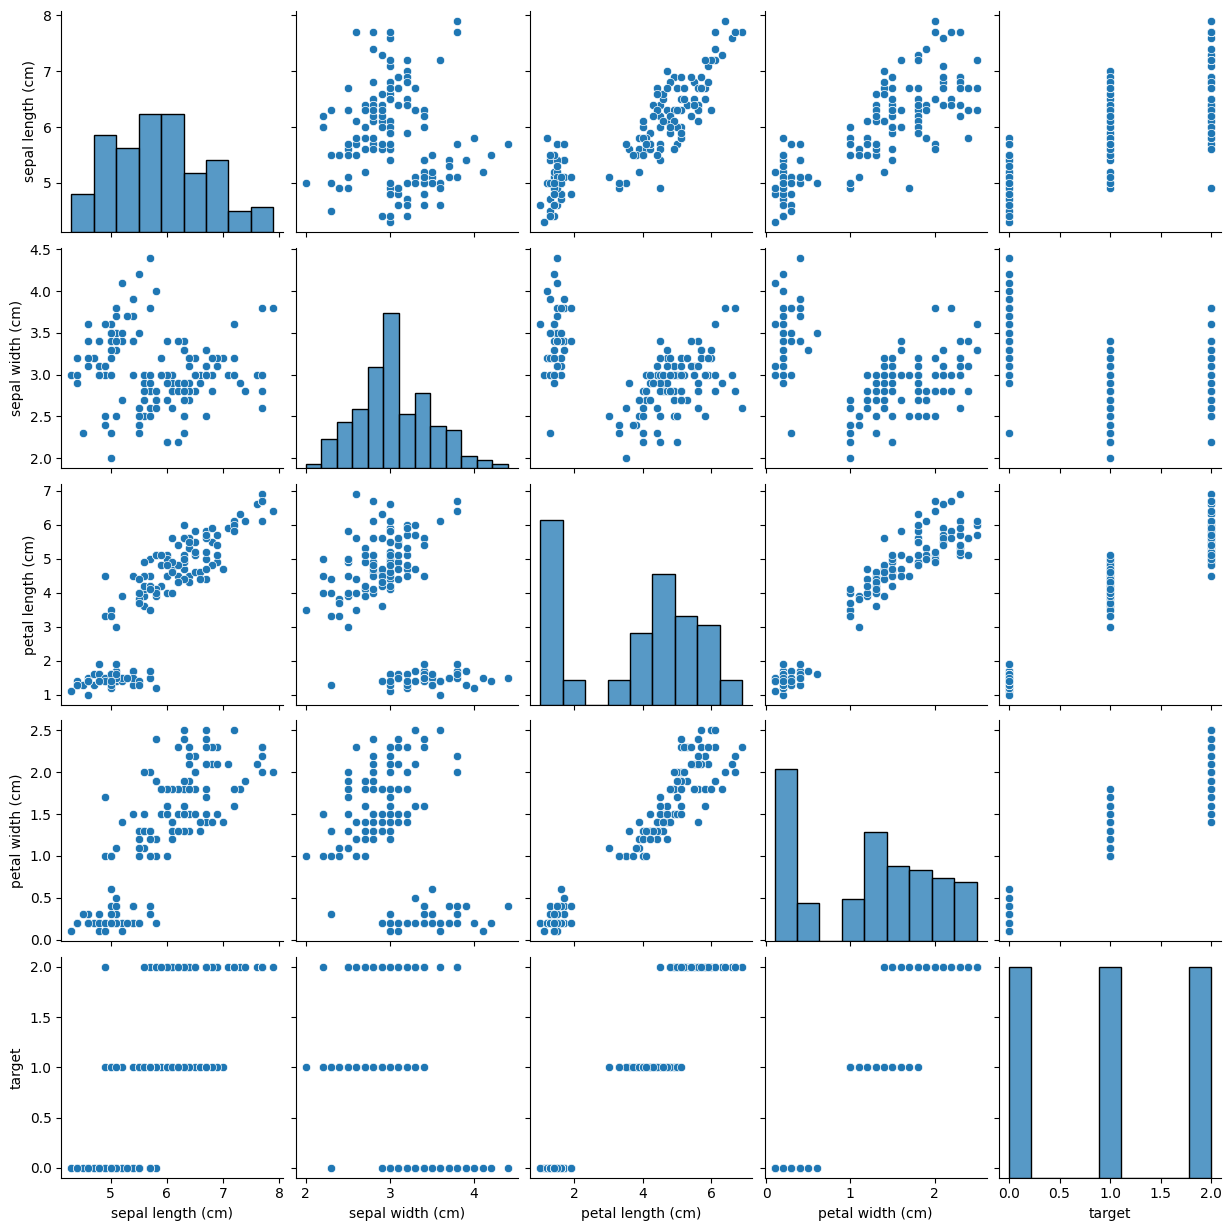

In [3]:
# 산점도 그래프를 이용해서 선형 관계 확인

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["target"])
df_iris = pd.concat([X,y], axis=1)
sns.pairplot(df_iris)


In [4]:
# ols를 이용한 선형 회귀 분석

# statsmodels 패키지를 사용한 선형 회귀분석

iris = load_iris()

# 독립 변수와 종속 변수 데이터 준비
X = iris.data
y = iris.target

# OLS 모델 생성
ols_model = sm.OLS(y, sm.add_constant(X))

# OLS 모델 피팅 및 결과 요약
ols_result = ols_model.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     484.5
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           8.46e-83
Time:                        20:29:59   Log-Likelihood:                 17.437
No. Observations:                 150   AIC:                            -24.87
Df Residuals:                     145   BIC:                            -9.821
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1865      0.205      0.910      0.3

In [5]:
# 변수의 다중공선성 확인 
iris = load_iris()
df =  pd.DataFrame(data=iris.data, columns=iris.feature_names)

vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns 

vif



,VIF Factor,features
0,262.969348,sepal length (cm)
1,96.353292,sepal width (cm)
2,172.960962,petal length (cm)
3,55.502060,petal width (cm)


In [8]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["target"])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  변수 선택 후 결과 저장할 데이터 프레임 생성
df_select = pd.DataFrame()
df_select.index = x_train.columns

# 트레인 테스트 데이터 분리

selector = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=3, direction = "forward" , scoring='r2', cv=5,n_jobs=-1)
selector.fit(x_train, y_train)
df_select["fwd"] = selector.get_support().tolist()

selector = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=3, direction = "backward" , scoring='r2', cv=5,n_jobs=-1)
selector.fit(x_train, y_train)
df_select["bwd"] = selector.get_support().tolist()

df_select

,fwd,bwd
sepal length (cm),True,True
sepal width (cm),False,False
petal length (cm),True,True
petal width (cm),True,True


In [16]:
model = LinearRegression() # 상수항 결합을 자동으로 해주므로 사용자가 직접 add_constant 등의 명령를 써서 상수항 결합을 할 필요는 없다.

# 모델 피팅
model.fit(x_train,y_train)
pred = model.predict(x_test)

# # 예측값과 실제값을 빼줘서 잔차 도출
잔차 = pred - y_test
잔차.reset_index( drop=True, inplace=True)

# # 절편, 회귀계수 출력
df_co = pd.DataFrame(data=model.coef_,columns= model.feature_names_in_)
print("절편:", model.intercept_)
print(mean_squared_error(y_test,pred))
df_co

절편: [0.25252759]
0.03711379440797689


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.116335,-0.059778,0.254914,0.547596


In [18]:
cut_off_point = np.percentile(잔차, 50)
cut_off_point

0.024337223626161975

In [15]:
cut_off_point = np.percentile(잔차["target"], 50)
잔차["point"] = 0
잔차.loc[잔차["target"] > cut_off_point, "point"] = 1

print(normality_test(잔차))
print("-------------------------------------------")
print(homoscedasticity_test(잔차,tool="bartlett"))

      col         p_val     t_val
0  target  4.652496e-01  0.967183
1   point  2.211095e-07  0.638237
-------------------------------------------
      col     p_val     t_val
0  target  0.516985  0.419903
1   point       NaN       NaN


c:\Users\leeju\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:2573: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
c:\Users\leeju\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:2573: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


In [19]:
durbin(잔차)

양의 자기상관이 있다. 1.7116070010510767


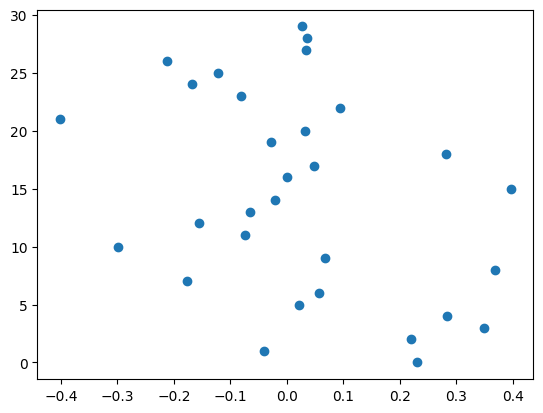

In [12]:
plt.scatter(잔차.target, 잔차.index)